#### Problem Statement:

Essentially, the company Boombikes wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands

# Data understanding

In [4]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read data from CSV file.
df = pd.read_csv('day (2).csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Get column information of the datasource
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Categorical columns
# workingday, weathersit, mnth, yr, season, holiday, weekday

In [9]:
# Changed weekday and season values from integers to specific string values which will be helpful when we create dummy variables.
df.loc[(df['weekday'] == 0) , 'weekday'] = 'wday0'
df.loc[(df['weekday'] == 1) , 'weekday'] = 'wday1'
df.loc[(df['weekday'] == 2) , 'weekday'] = 'wday2'
df.loc[(df['weekday'] == 3) , 'weekday'] = 'wday3'
df.loc[(df['weekday'] == 4) , 'weekday'] = 'wday4'
df.loc[(df['weekday'] == 5) , 'weekday'] = 'wday5'
df.loc[(df['weekday'] == 6) , 'weekday'] = 'wday6'

df.loc[(df['season'] == 1) , 'season'] = 'se1'
df.loc[(df['season'] == 2) , 'season'] = 'se2'
df.loc[(df['season'] == 3) , 'season'] = 'se3'
df.loc[(df['season'] == 4) , 'season'] = 'se4'

In [10]:
# function to update the month column value to month name.
def month_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two colu"mns
df[['mnth']] = df[['mnth']].apply(month_map)

In [11]:
# function to update the weathersit column value to name.
def weathersit_map(x):
    return x.map({1: 'wea01', 2: 'wea02', 3: 'wea03'})

# Applying the function to the two columns
df[['weathersit']] = df[['weathersit']].apply(weathersit_map)

In [12]:
# verify the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


# Data Visualisation

<Axes: xlabel='yr', ylabel='cnt'>

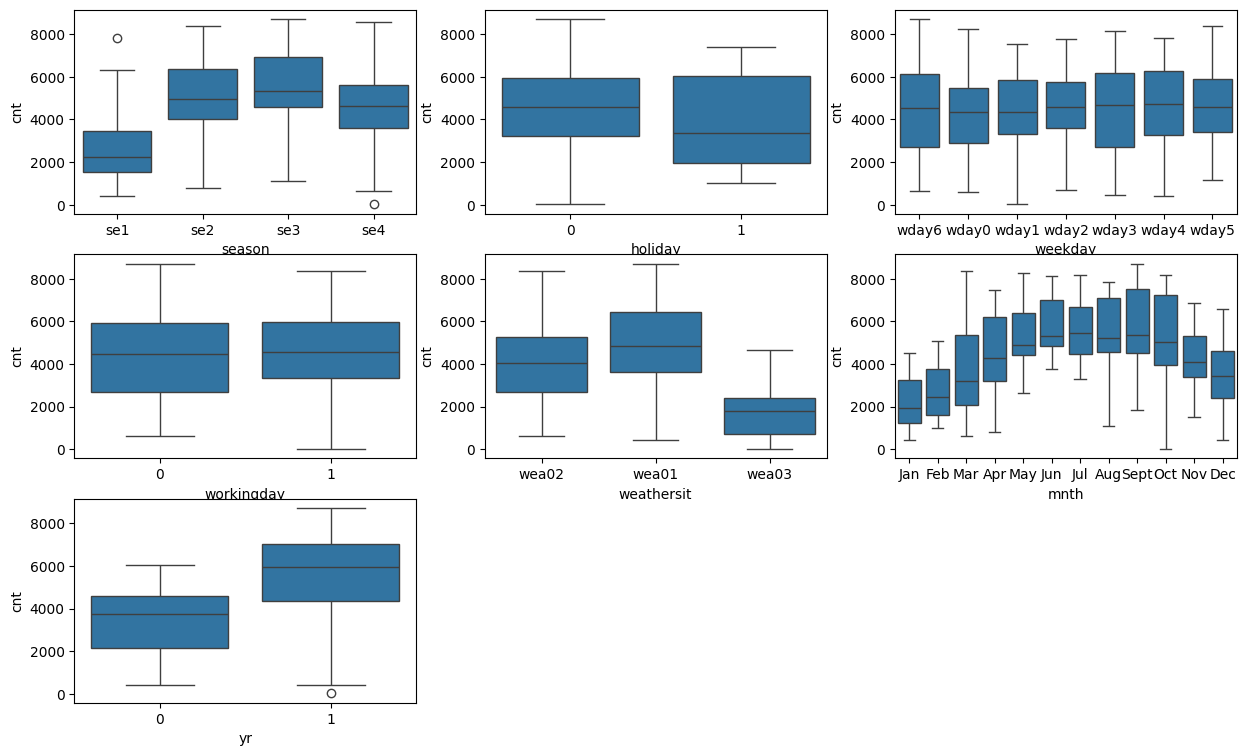

In [13]:
# create a boxplot to identify the outliers.
plt.figure(figsize=(15,9))

plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(3,3,2)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(3,3,4)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(3,3,5)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(3,3,6)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data=df)

In [14]:
# Numeric variables : temp, atemp, hum, windspeed, casual, registered, cnt
var_list = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']
df[var_list].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
# Remove instant and date column as not required in this model
df = df.drop(['instant', 'dteday'], axis=1)

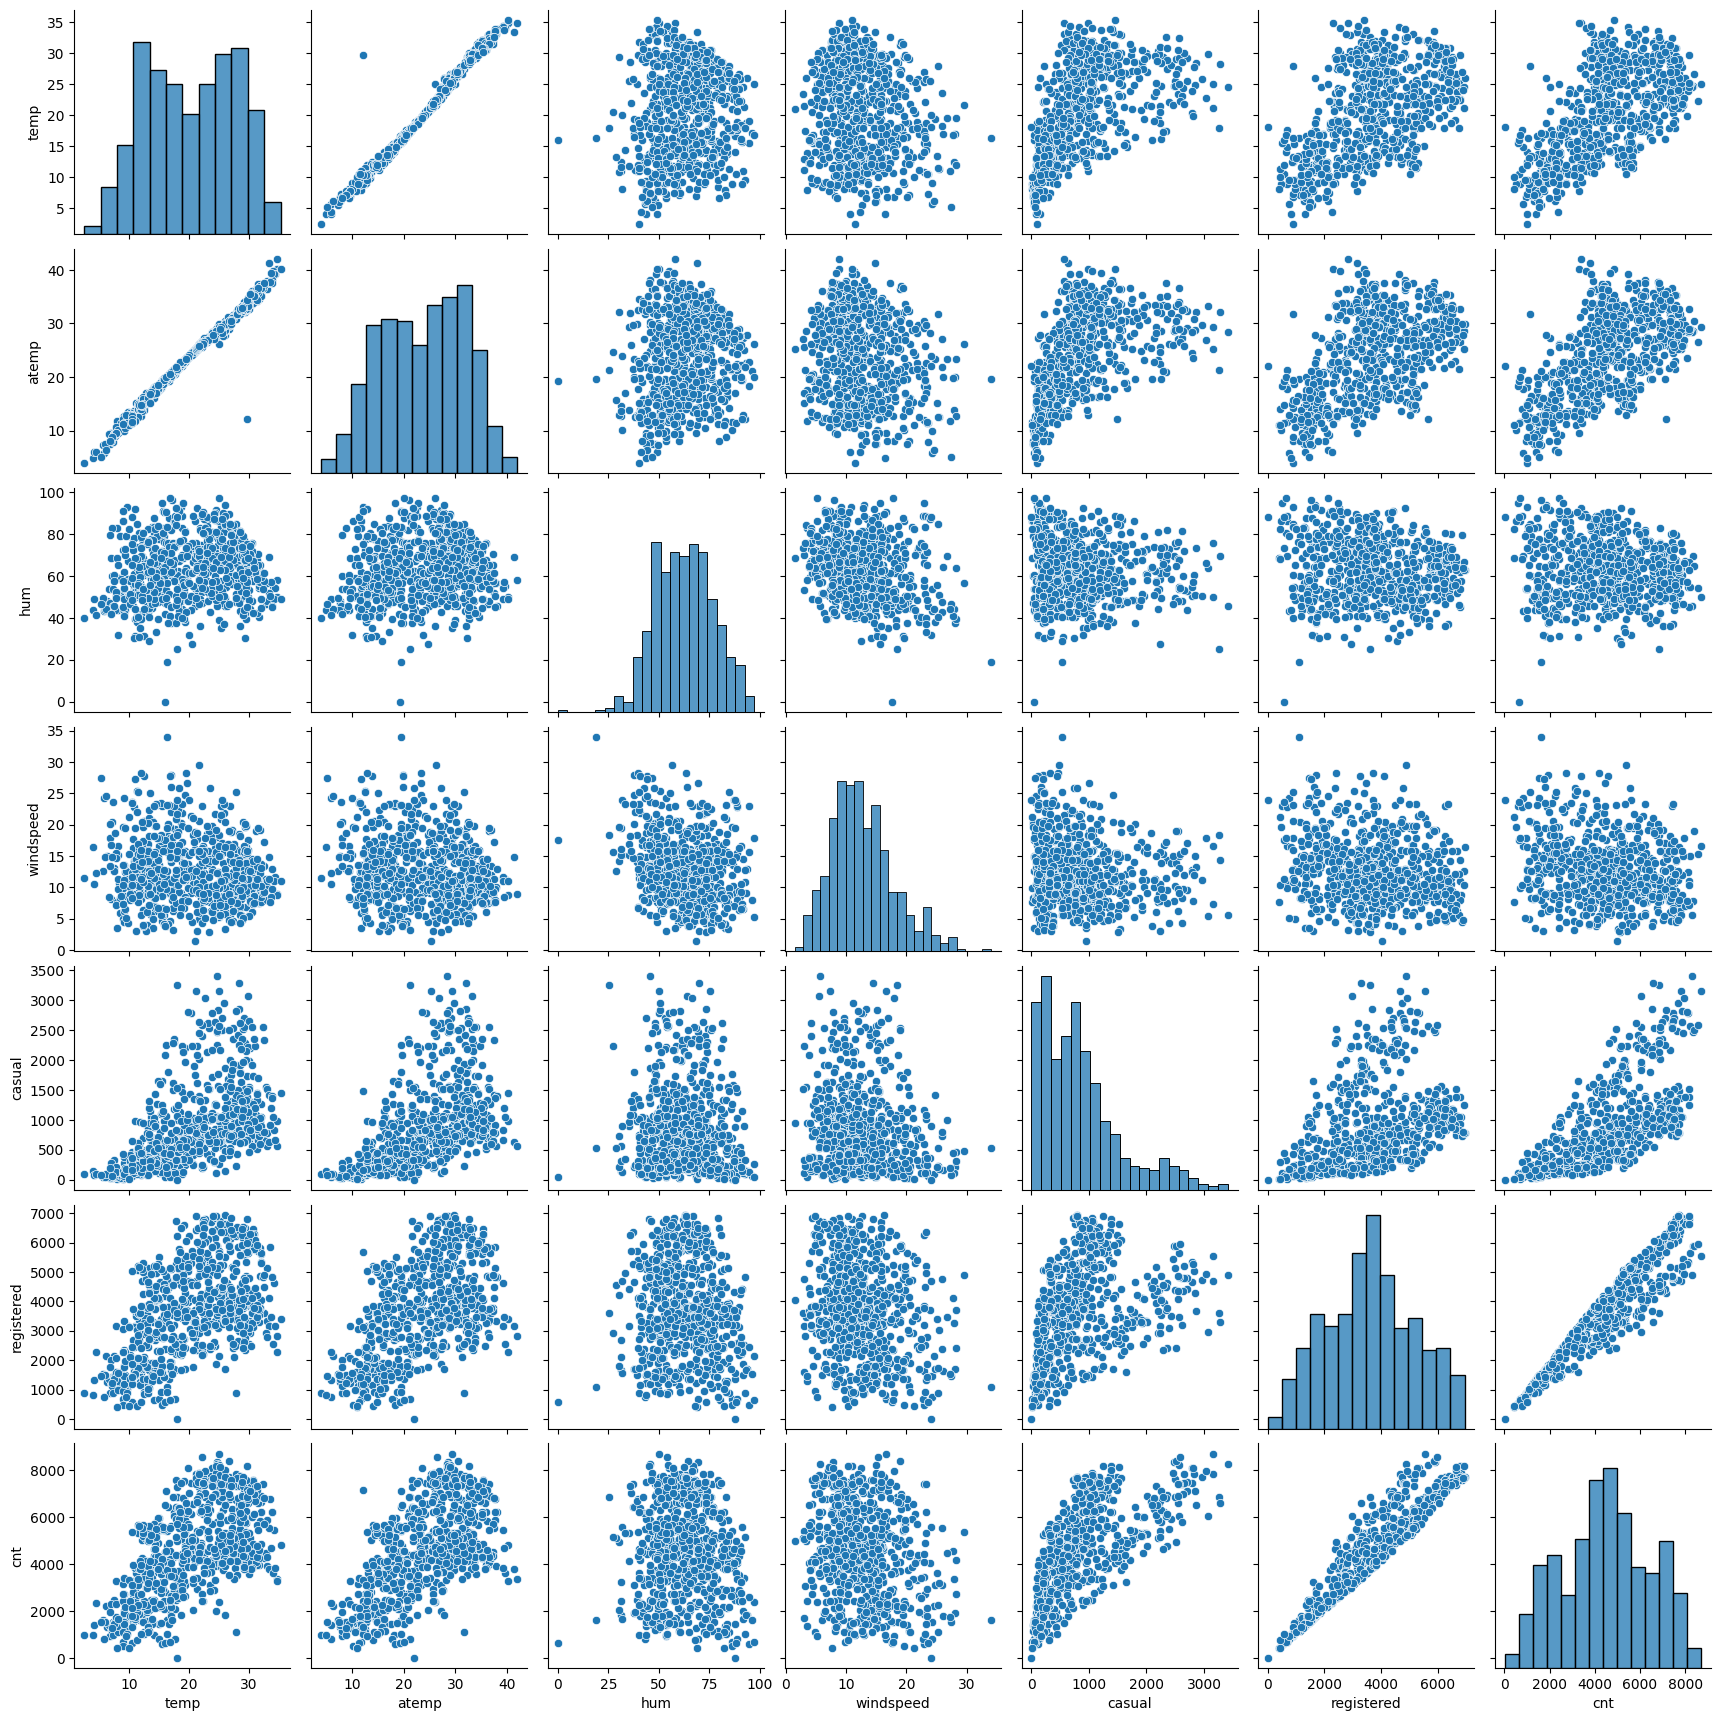

In [16]:
# display pairwise scatter plot
sns.pairplot(df[var_list])
plt.show()

In [17]:
# changed datatype of the below columns to float
df['cnt'] = df['cnt'].astype("float")
df['casual'] = df['casual'].astype("float")
df['registered'] = df['registered'].astype("float")

In [18]:
# Correlation matrix
cor = df[var_list].corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

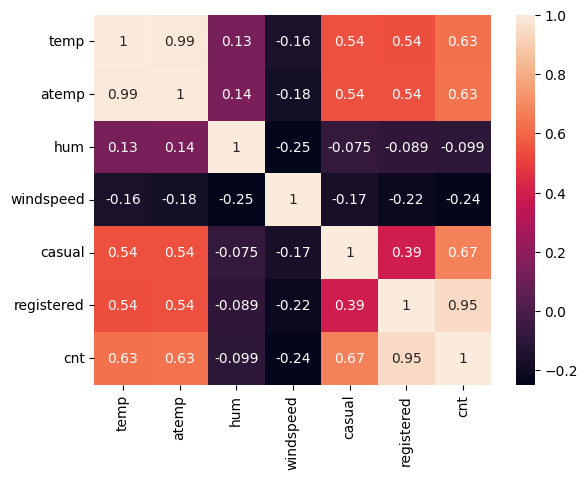

In [19]:
# display corrlation in heatmap to find the highly correlated values.
sns.heatmap(cor, annot=True)

In [20]:
# 'atemp' variable is highly correlated with 'temp', so we drop that.
df.drop('atemp', inplace=True, axis=1)

In [21]:
# Create dummy variables
# season, holiday, weekday, workingday, weathersit, mnth, yr
dummy_var = ['season', 'weekday', 'weathersit', 'mnth']
dummy_columns = pd.get_dummies(df[dummy_var], drop_first=True)


In [22]:
# drop categorical columns
df = df.drop(dummy_var, axis=1)

In [23]:
# concat all dummy columns with dataframe
df = pd.concat([df, dummy_columns], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   casual            730 non-null    float64
 7   registered        730 non-null    float64
 8   cnt               730 non-null    float64
 9   season_se2        730 non-null    bool   
 10  season_se3        730 non-null    bool   
 11  season_se4        730 non-null    bool   
 12  weekday_wday1     730 non-null    bool   
 13  weekday_wday2     730 non-null    bool   
 14  weekday_wday3     730 non-null    bool   
 15  weekday_wday4     730 non-null    bool   
 16  weekday_wday5     730 non-null    bool   
 1

# Model Building

In [24]:
# split data into train and test dataset
df_train, df_test = train_test_split(df, train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [25]:
# we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables.
scaler = MinMaxScaler()
var_num = ['temp','hum','windspeed', 'casual','registered','cnt']
df_train[var_num] = scaler.fit_transform(df_train[var_num])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_se2,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,False,...,False,False,False,False,False,True,False,False,False,False
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,False,...,True,False,False,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,True,...,False,False,False,False,False,False,False,False,False,False
111,0,0,1,0.345824,0.751824,0.380981,0.053337,0.214554,0.191095,True,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.254689,0.523781,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.206015,0.227896,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


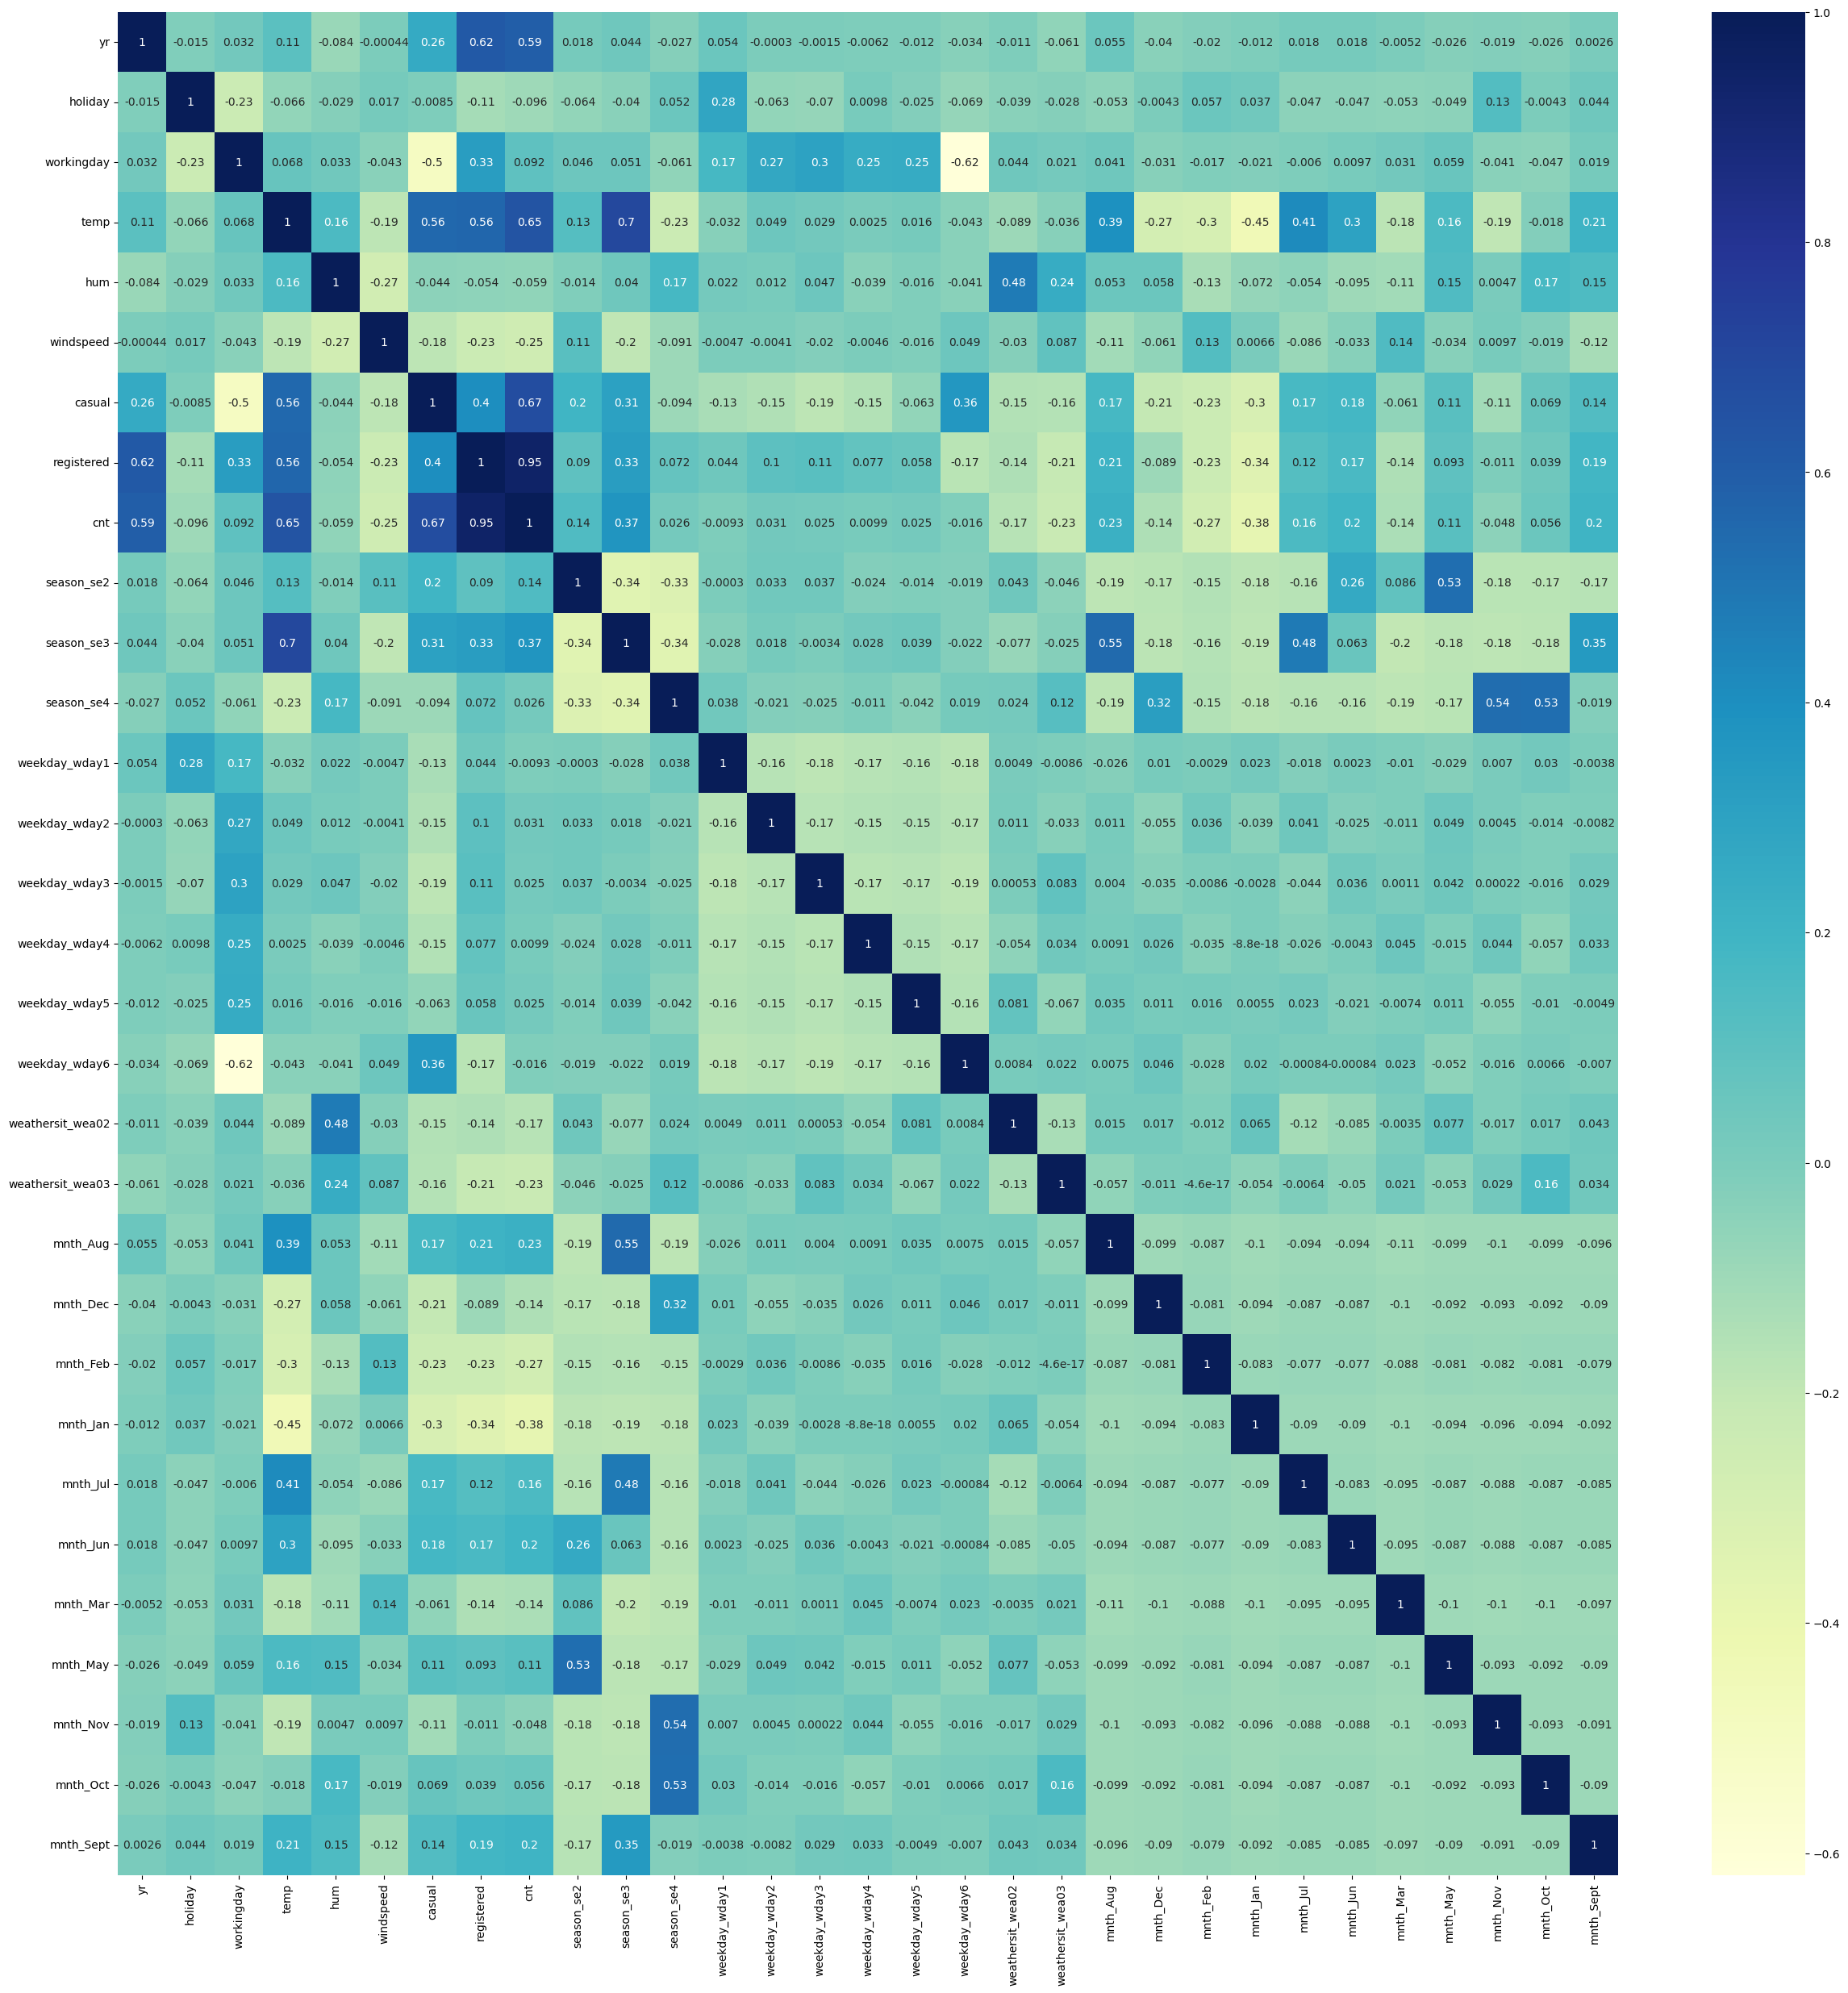

In [27]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu" )
plt.show()

In [28]:
# According to heatmap temp, casual and registered is highly correlated with cnt.

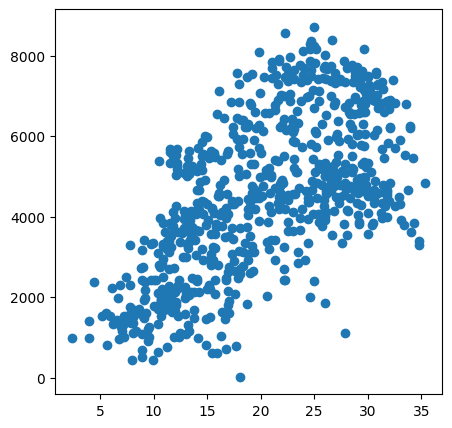

In [29]:
# Visualize cnt and temp variable using scatter plot.
plt.figure(figsize=[5,5])
plt.scatter(df.temp, df.cnt)
plt.show()

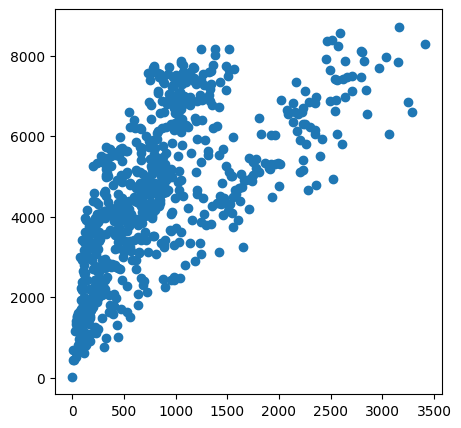

In [30]:
# Visualize cnt and casual variable using scatter plot.
plt.figure(figsize=[5,5])
plt.scatter(df.casual, df.cnt)
plt.show()

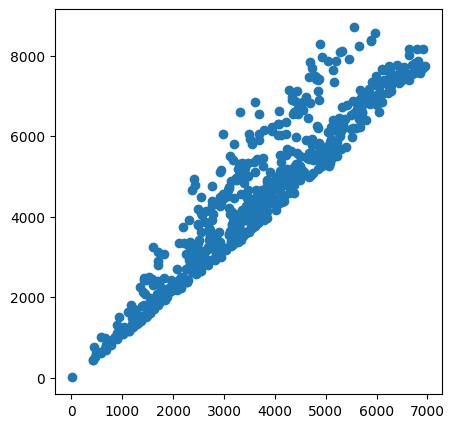

In [31]:
# Visualize cnt and registered variable using scatter plot.
plt.figure(figsize=[5,5])
plt.scatter(df.registered, df.cnt)
plt.show()

In [32]:
# cnt is target variable so shifted to y_train.
# casual and registered are removed from the x_train.
y_train = df_train.pop('cnt')
x_train = df_train.drop(["casual","registered"],axis=1)

# Model with all features

In [33]:
# Build model with all features.
x_train_lm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_lm.astype(float)).fit()
lr.params

const               0.239606
yr                  0.232438
holiday            -0.042297
workingday          0.043838
temp                0.445359
hum                -0.151473
windspeed          -0.186010
season_se2          0.087836
season_se3          0.044834
season_se4          0.152466
weekday_wday1      -0.009925
weekday_wday2      -0.006925
weekday_wday3       0.005511
weekday_wday4       0.001875
weekday_wday5       0.011006
weekday_wday6       0.054220
weathersit_wea02   -0.059551
weathersit_wea03   -0.255835
mnth_Aug            0.020376
mnth_Dec           -0.044277
mnth_Feb           -0.032441
mnth_Jan           -0.063315
mnth_Jul           -0.033848
mnth_Jun            0.004602
mnth_Mar            0.001274
mnth_May            0.024673
mnth_Nov           -0.039879
mnth_Oct            0.007546
mnth_Sept           0.085938
dtype: float64

In [34]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          3.00e-181
Time:                        14:03:34   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2396      0.042      5.711      0.000       0.157       0.322
yr                   0.2324      0.008     28.819      0.000       0.217       0.248
holiday             -0.0423      0.024     -1.792      0.074      -0.089       0.004
workingday           0.0438      0.009      4.680      0.000       0.025       0.062
temp                 0.4454      0.046      9.628      0.000       0.354       0.536
hum                 -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed           -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_se2           0.0878      0.024      3.721      0.000       0.041       0.134
season_se3           0.0448      0.030      1.496      0.135      -0.014       0.104
season_se4           0.1525      0.026      5.873      0.000       0.101       0.203
weekday_wday1       -0.0099      0.010     -1.021      0.308      -0.029       0.009
weekday_wday2       -0.0069      0.011     -0.621      0.535      -0.029       0.015
weekday_wday3        0.0055      0.011      0.524      0.600      -0.015       0.026
weekday_wday4        0.0019      0.011      0.172      0.864      -0.020       0.023
weekday_wday5        0.0110      0.011      0.987      0.324      -0.011       0.033
weekday_wday6        0.0542      0.015      3.732      0.000       0.026       0.083
weathersit_wea02    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit_wea03    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
mnth_Aug             0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec            -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb            -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan            -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_Jul            -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_Jun             0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_Mar             0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May             0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov            -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct             0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sept            0.0859      0.032      2.692      0.007       0.023       0.149
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. N

 The adjusted R-square value is 84% and R-square value is 84.8% of the above model which seems good.

# RFE

In [35]:
# Reduce feature to 15 and create model using RFE.
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(x_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True False  True  True  True  True
  True  True False False  True False False False False False False False
 False False False  True]
[ 1  1  1  1  1  1  1  4  1  1  1  1  1  1  3  2  1 11  8  9  6  5 13 14
 10  7 12  1]


In [36]:
col1 = x_train.columns[rfe1.support_]
x_train_rfe1 = x_train[col1]
# Add a constant to the model
x_train_rfe1 = sm.add_constant(x_train_rfe1)
x_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_se2,season_se4,weekday_wday1,weekday_wday2,weekday_wday3,weekday_wday4,weekday_wday5,weathersit_wea03,mnth_Sept
576,1.0,1,0,1,0.815169,0.725633,0.264686,False,False,False,True,False,False,False,False,False
426,1.0,1,0,0,0.442393,0.640189,0.255342,False,False,False,False,False,False,False,False,False
728,1.0,1,0,0,0.245101,0.498067,0.663106,False,False,False,False,False,False,False,False,False
482,1.0,1,0,0,0.395666,0.504508,0.188475,True,False,False,False,False,False,False,False,False
111,1.0,0,0,1,0.345824,0.751824,0.380981,True,False,False,False,False,False,True,False,False


In [37]:
# Fitting the model with selected variables.
lm = sm.OLS(y_train, x_train_rfe1.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          4.91e-181
Time:                        14:03:36   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2572      0.027  

The adjusted R-square value is 83.9% and R-square value is 84.4% of the above model which seems good.

In [38]:
# Remove constant variable.
x_train_rfe1.drop('const', axis=1, inplace=True)

In [39]:
# Check multicollinearity of selected variable
vif = pd.DataFrame()
vif['Features'] = x_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe1.values.astype(float), i) for i in range(x_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
8,weekday_wday1,inf
9,weekday_wday2,inf
10,weekday_wday3,inf
11,weekday_wday4,inf
12,weekday_wday5,inf
4,hum,10.96
3,temp,7.20
5,windspeed,3.59


In [40]:
# Repeat steps and build model with 9 variables.
lmm = LinearRegression()
rfe2 = RFE(estimator=lmm, n_features_to_select=9)

# Fit with 9 features
rfe2.fit(x_train, y_train)

# Subset the features selected by rfe1
col1 = x_train.columns[rfe2.support_]

# Subsetting training data for 15 selected columns
x_train_rfe2 = x_train[col1]

# Add a constant to the model
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lmm = sm.OLS(y_train, x_train_rfe2.astype(float)).fit()
print(lmm.summary())
x_train_rfe2 = x_train_rfe2.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values.astype(float), i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     142.6
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          6.51e-124
Time:                        14:03:41   Log-Likelihood:                 341.61
No. Observations:                 510   AIC:                            -665.2
Df Residuals:                     501   BIC:                            -627.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0752      0.017      4.462

,Features,VIF
1,holiday,inf
2,workingday,inf
4,weekday_wday1,inf
5,weekday_wday2,inf
6,weekday_wday3,inf
7,weekday_wday4,inf
8,weekday_wday5,inf
3,temp,3.17
0,yr,1.95


In [41]:
# 'hum' variable's VIF is > 5.0 so will drop and build model again.

x_train_rfe2 = sm.add_constant(x_train_rfe2)
lmm = sm.OLS(y_train, x_train_rfe2.astype(float)).fit()
print(lmm.summary())
x_train_rfe2 = x_train_rfe2.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values.astype(float), i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     142.6
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          6.51e-124
Time:                        14:03:42   Log-Likelihood:                 341.61
No. Observations:                 510   AIC:                            -665.2
Df Residuals:                     501   BIC:                            -627.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0752      0.017      4.462

,Features,VIF
1,holiday,inf
2,workingday,inf
4,weekday_wday1,inf
5,weekday_wday2,inf
6,weekday_wday3,inf
7,weekday_wday4,inf
8,weekday_wday5,inf
3,temp,3.17
0,yr,1.95


Below code is repeated again because after removing constant, am getting error to find the predict value.

In [42]:
x_train_rfe3 = sm.add_constant(x_train_rfe2)
lmm_dummy = sm.OLS(y_train, x_train_rfe3.astype(float)).fit()

# Residual Analysis

In [43]:
y_train_cnt = lmm_dummy.predict(x_train_rfe3)

Text(0.5, 0, 'Errors')

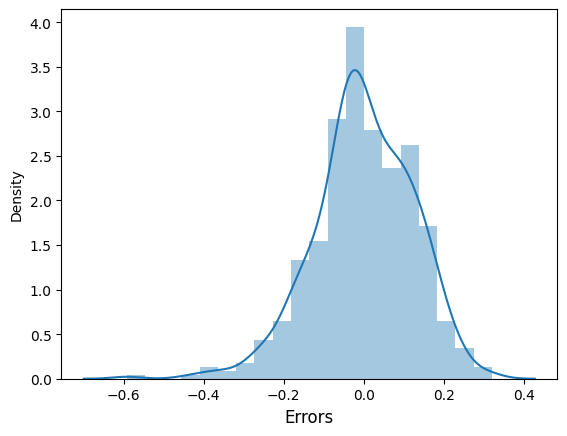

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
# Give the X-label
plt.xlabel('Errors', fontsize = 12)

# Making prediction

In [45]:
var_num

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [46]:
#Implementing scaler transforms on the test dataset
df_test[var_num] = scaler.transform(df_test[var_num])

In [47]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
x_test = df_test.drop(["casual","registered"],axis=1)

In [48]:
x_train_rfe2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'weekday_wday1', 'weekday_wday2',
       'weekday_wday3', 'weekday_wday4', 'weekday_wday5'],
      dtype='object')

In [49]:
# Prediction for x_test_rfe4:
x_test_rfe4 = x_test[x_train_rfe2.columns]
x_test_rfe4 = sm.add_constant(x_test_rfe4)
y_pred = lmm.predict(x_test_rfe4)

Text(0, 0.5, 'y_pred')

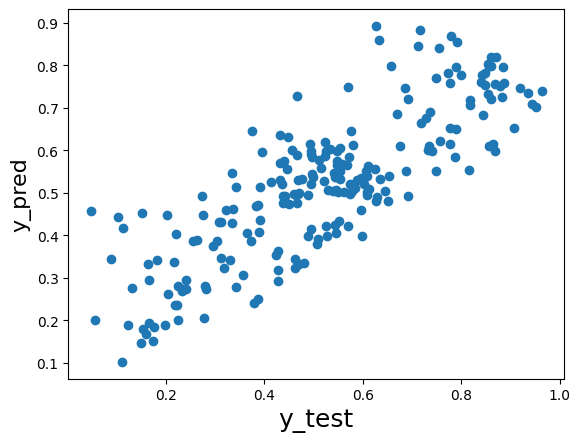

In [50]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6749980863253544